<a href="https://colab.research.google.com/github/nsnisarga/autism/blob/main/Copy_of_aut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

# Assuming Google Drive is mounted
base_dir = '/content/gdrive/MyDrive/ASD'  # Adjust this to your folder name in Google Drive
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training ASD pictures
train_asd_dir = os.path.join(train_dir, 'Autistic')

# Directory with our training NASD pictures
train_nasd_dir = os.path.join(train_dir, 'Non_Autistic')

# Directory with our validation ASD pictures
validation_asd_dir = os.path.join(validation_dir, 'Autistic')

# Directory with our validation NASD pictures
validation_nasd_dir = os.path.join(validation_dir, 'Non_Autistic')

# Directory with our TEST ASD pictures
test_asd_dir = os.path.join(test_dir, 'Autistic')

# Directory with our TEST NASD pictures
test_nasd_dir = os.path.join(test_dir, 'Non_Autistic')


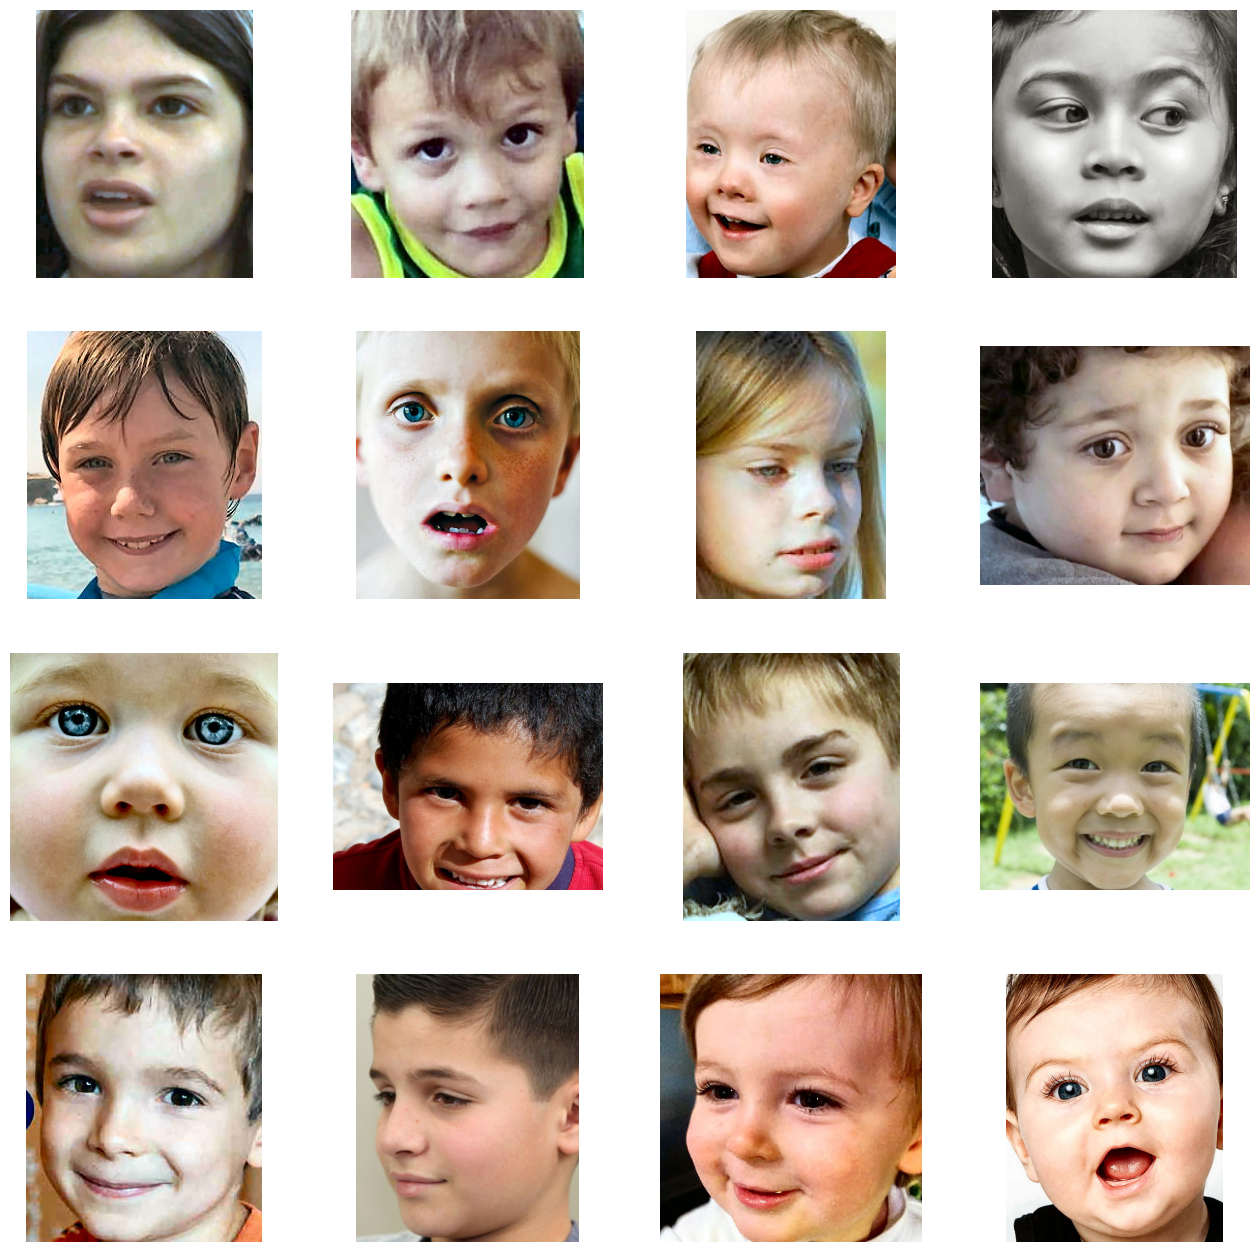

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_asd_fnames = os.listdir( train_asd_dir )
train_nasd_fnames = os.listdir( train_nasd_dir )


next_asd_pix = [os.path.join(train_asd_dir, fname)
                for fname in train_asd_fnames[ pic_index-8:pic_index]
               ]

next_nasd_pix = [os.path.join(train_nasd_dir, fname)
                for fname in train_nasd_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_asd_pix+next_nasd_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/ASD/train',
                                             target_size=(224,224),
                                             batch_size=16,
                                             class_mode='binary')
#Validation Set
valid_set = valid_datagen.flow_from_directory('/content/gdrive/MyDrive/ASD/valid',
                                           target_size=(224,224),
                                           batch_size = 16,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/ASD/test',
                                            target_size=(224,224),
                                            batch_size = 16,
                                            class_mode='binary',
                                            shuffle=False)

Found 2654 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


In [ ]:
! pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-mzhwv4he
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/classification_models.git /tmp/pip-req-build-mzhwv4he
  Resolved https://github.com/qubvel/classification_models.git to commit a0f006e05485a34ccf871c421279864b0ccd220b
  Running command git submodule update --init --recursive -q
  Preparing metadata (setup.py) ... done


In [ ]:
from tensorflow.keras import layers
import tensorflow as tf
from classification_models.keras import Classifiers
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Load ResNet50 model
ResNet50, preprocess_input = Classifiers.get('resnet50')

# Create the base model
base_model = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=[base_model.input], outputs=[output])

# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with ModelCheckpoint
resnet_best = model.fit(
    train_set,
    validation_data=valid_set,
    epochs=1,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10),
        ModelCheckpoint(filepath='/content/gdrive/MyDrive/DNN Keras Models/resnet50_imagenet_adam.keras', save_best_only=True)
    ]
)


166/166 ━━━━━━━━━━━━━━━━━━━━ 2288s 14s/step - accuracy: 0.6479 - loss: 0.6107 - val_accuracy: 0.5000 - val_loss: 0.7722


In [ ]:
model.save('/content/gdrive/MyDrive/Models/resnet50_best.h5')

In [ ]:
#model for plotting
inception = model.fit(train_set, validation_data = valid_set, steps_per_epoch = 1, epochs = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 33s 33s/step - accuracy: 0.8125 - loss: 0.4108 - val_accuracy: 0.5000 - val_loss: 0.6945


In [ ]:
model.save('/content/gdrive/MyDrive/Models/resnet50_100.h5')

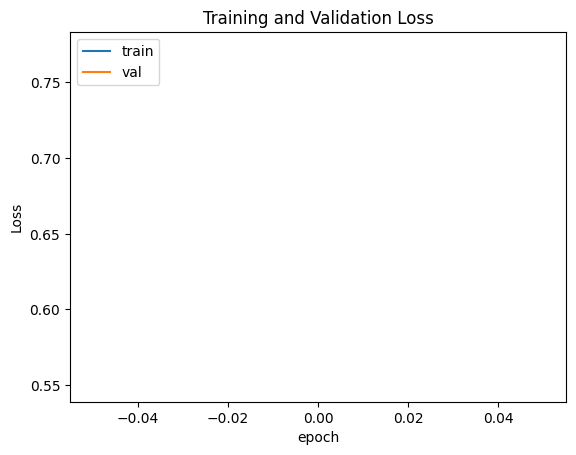

In [ ]:
import keras
from matplotlib import pyplot as plt


plt.plot(resnet_best.history['loss'])
plt.plot(resnet_best.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

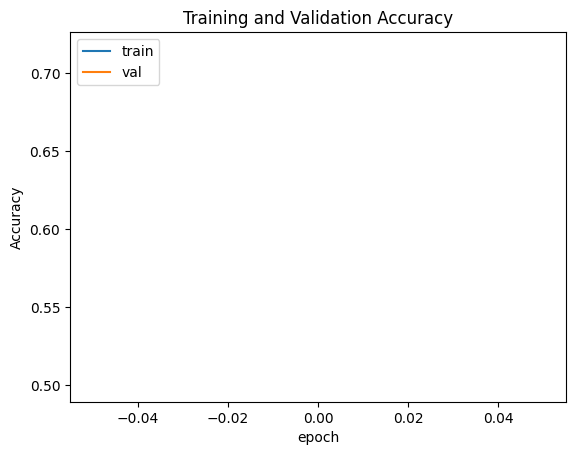

In [ ]:
import keras
from matplotlib import pyplot as plt


plt.plot(resnet_best.history['accuracy'])
plt.plot(resnet_best.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
import pandas as pd
test_set.reset
ytesthat = model.predict(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert the predicted probabilities to binary predictions
y_pred_binary = (ytesthat > 0.5).astype(int)

# Get the true labels from the test set
y_true = test_set.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_binary)

# Calculate precision
precision = precision_score(y_true, y_pred_binary)

# Calculate recall
recall = recall_score(y_true, y_pred_binary)

# Calculate F1 score
f1 = f1_score(y_true, y_pred_binary)

# Print the metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 176s 10s/step
Test Accuracy: 0.5
Precision: 0.5
Recall: 0.007142857142857143
F1 Score: 0.014084507042253521


1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step


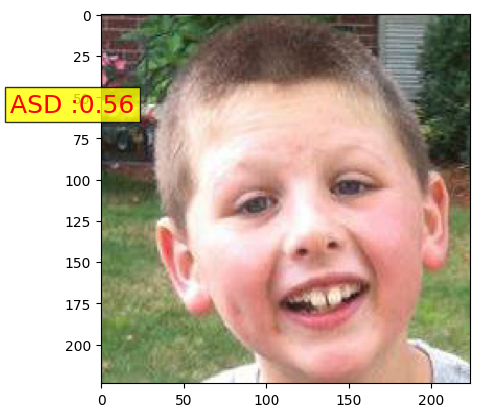

In [ ]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/gdrive/MyDrive/ASD/test/Autistic/001.jpg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='NASD :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='yellow',alpha=0.8))
else:
    value ='ASD :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,horizontalalignment='right',
        verticalalignment='bottom',bbox=dict(facecolor='yellow',alpha=0.8))

plt.imshow(img1)
plt.show()

In [ ]:

import pandas as pd
test_set.reset
ytesthat = model.predict(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})

18/18 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step


In [ ]:
import pandas as pd
test_set.reset
ytesthat = model.predict(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})


18/18 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step


In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)


In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 280 Testing images : %d'%misclassified['y'].count())


Total misclassified image from 280 Testing images : 140


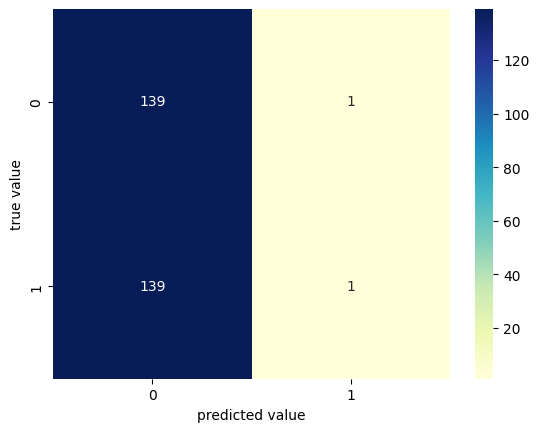

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

#Training Set
train_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/ASD/train',
                                             target_size=(224,224),
                                             batch_size=10,
                                             shuffle=False,
                                             class_mode='binary')

Found 2654 images belonging to 2 classes.


In [ ]:
import pandas as pd
train_set.reset
ytrainhat = model.predict(train_set)
df = pd.DataFrame({
    'filename':train_set.filenames,
    'predict':ytrainhat[:,0],
    'y':train_set.classes
})

266/266 ━━━━━━━━━━━━━━━━━━━━ 560s 2s/step


In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 2526 Training images : %d'%misclassified['y'].count())

Total misclassified image from 2526 Training images : 1326


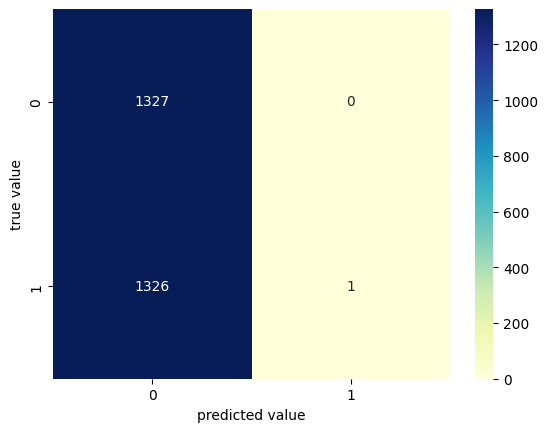

In [ ]:

#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
import pandas as pd
valid_set.reset
yvalidhat = model.predict(valid_set)
df = pd.DataFrame({
    'filename':valid_set.filenames,
    'predict':yvalidhat[:,0],
    'y':valid_set.classes
})

5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step


In [ ]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:

misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 80 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 80 Validation images : 40


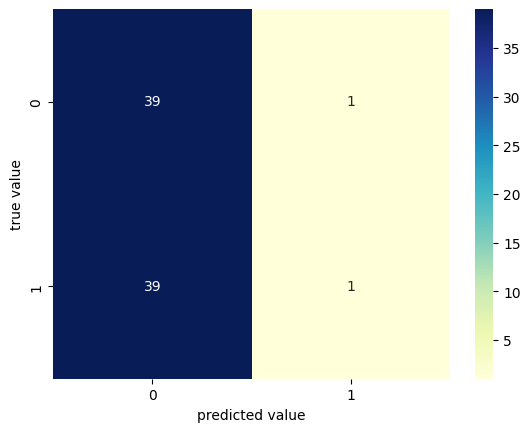

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');